In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import ipywidgets

df = pd.read_csv('dset.csv')

In [4]:
print('# # # Dataset information # # # \n')
print(df.info())
print(f'# # # Pandas built-in statistical discription of dataset columns # # # \n{df.describe()}')
print(f'# # # Amount of null entries per column # # # \n{df.isna().sum()}')
print(f'# # # Overall amount of null entries in dataset # # # \n{df.isna().sum().sum()}')
print(f'# # # Column names # # # \n{df.columns}')

# # # Dataset information # # # 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4734 entries, 0 to 4733
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Phase                4734 non-null   int64  
 1   Indicator            4734 non-null   object 
 2   Group                4734 non-null   object 
 3   State                4734 non-null   object 
 4   Subgroup             4734 non-null   object 
 5   Week                 4734 non-null   int64  
 6   Week Label           4734 non-null   object 
 7   Value                4620 non-null   float64
 8   Low CI               4620 non-null   float64
 9   High CI              4620 non-null   float64
 10  Confidence Interval  4620 non-null   object 
 11  Quartile Range       3366 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 443.9+ KB
None
# # # Pandas built-in statistical discription of dataset columns # # # 
             Phase

### Dataset consists of values gathered from different group representatives (grouped by age, race, education, gender and state). My aim is to mainly focus on age, race, education and gender groups and find out if there is any difference in getting medical care for people within a group (by comparing different subgroups). Also, i would like to see if there was any overall improvement over time.

In [70]:
# Phase -1 entries do not have any statistical values, so I will omit that group in the analysis
df[df['Value'].isnull()]

,Phase,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile Range


In [6]:
# drop rows, where Phase is -1
df = df[df.Phase != -1]

In [7]:
print(f'# # # Amount of null entries per column # # # \n{df.isna().sum()}')

# # # Amount of null entries per column # # # 
Phase                     0
Indicator                 0
Group                     0
State                     0
Subgroup                  0
Week                      0
Week Label                0
Value                     0
Low CI                    0
High CI                   0
Confidence Interval       0
Quartile Range         1254
dtype: int64


#### By dropping all Phase -1 entries we get rid of empty entries in the Value column

In [8]:
# some entries do not have quartile ranges, i will leave them, because these values won't be used in my experiments
df[df['Quartile Range'].isnull()]

,Phase,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,1,"Delayed Medical Care, Last 4 Weeks",National Estimate,United States,United States,1,Apr 23 - May 5,38.7,38.1,39.4,38.1 - 39.4,NaN
1,1,"Delayed Medical Care, Last 4 Weeks",By Age,United States,18 - 29 years,1,Apr 23 - May 5,34.8,32.5,37.2,32.5 - 37.2,NaN
2,1,"Delayed Medical Care, Last 4 Weeks",By Age,United States,30 - 39 years,1,Apr 23 - May 5,37.3,35.6,39.0,35.6 - 39.0,NaN
3,1,"Delayed Medical Care, Last 4 Weeks",By Age,United States,40 - 49 years,1,Apr 23 - May 5,40.3,39.0,41.7,39.0 - 41.7,NaN
4,1,"Delayed Medical Care, Last 4 Weeks",By Age,United States,50 - 59 years,1,Apr 23 - May 5,40.7,39.3,42.2,39.3 - 42.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4678,3,"Delayed or Did Not Get Care, Last 4 Weeks",By Race/Hispanic ethnicity,United States,"Non-Hispanic, other races and multiple races",22,Jan 6 - Jan 18,43.4,39.0,47.9,39.0 - 47.9,NaN
4679,3,"Delayed or Did Not Get Care, Last 4 Weeks",By Education,United States,Less than a high school diploma,22,Jan 6 - Jan 18,40.1,36.4,43.9,36.4 - 43.9,NaN
4680,3,"Delayed or Did Not Get Care, Last 4 Weeks",By Education,United States,High school diploma or GED,22,Jan 6 - Jan 18,30.3,28.5,32.2,28.5 - 32.2,NaN
4681,3,"Delayed or Did Not Get Care, Last 4 Weeks",By Education,United States,Some college/Associate's degree,22,Jan 6 - Jan 18,38.2,37.1,39.4,37.1 - 39.4,NaN


In [9]:
df['Indicator'].unique()

array(['Delayed Medical Care, Last 4 Weeks',
       'Did Not Get Needed Care, Last 4 Weeks',
       'Delayed or Did Not Get Care, Last 4 Weeks'], dtype=object)

In [10]:
#preprocessing and wrangling data

df_copy = df.copy()

crit_vals = df_copy.iloc[:, 7:10]

# check if any value is above or below confidence interval

h0_rej = []
for i,j,k in zip(crit_vals['Value'], crit_vals['High CI'], crit_vals['Low CI']):
    if k < i < j:
        pass
    else:
        print(i)

#### None of the non-empty entries have a significant difference from predefined confidence interval.

In [11]:
grps = df['Group'].unique().tolist()

def cut_by_group(df, att, group):
    '''
        Function to create dataframe that only contains attribute and group of interest
    '''
    grps = df[att].unique().tolist()
    if group in grps:
        new_df = df[df[att] == group]
        return new_df
    else:
        print('Please specify a valid group')

#### There is no such values, that would be higher than their corresponding confidence intervals

By State                      3366
By Age                         462
By Race/Hispanic ethnicity     330
By Education                   264
By Gender                      132
National Estimate               66
Name: Group, dtype: int64


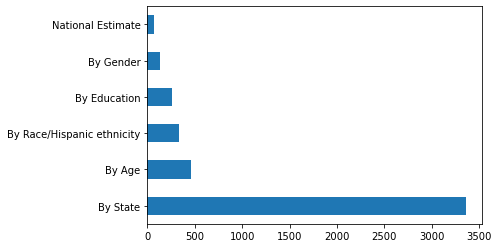

In [12]:
# inspect the distribution of groups

df['Group'].value_counts().plot(kind='barh')
print(df['Group'].value_counts())

Delayed Medical Care, Last 4 Weeks           1540
Did Not Get Needed Care, Last 4 Weeks        1540
Delayed or Did Not Get Care, Last 4 Weeks    1540
Name: Indicator, dtype: int64


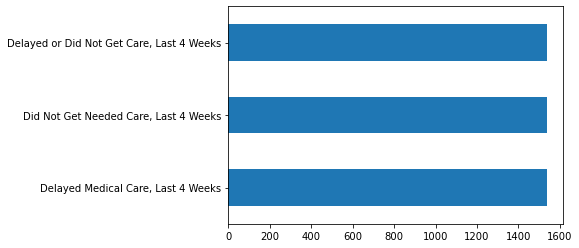

In [13]:
# inspect the distribution of indicators

df['Indicator'].value_counts().plot(kind='barh')
print(df['Indicator'].value_counts())

In [14]:
def vis_by_barplot(df, att, group):
    '''
        Takes dataframe, reduces it to the group of interest and creates barplot with counts of subgroups.
    '''
    df = cut_by_group(df, att, group)
    val_cts = df['Subgroup'][:20].value_counts()
    return val_cts.plot(kind='barh', ).set_title(group)

def val_per_week_by_boxplot(df, att, group):
    '''
        Takes dataframe, reduces it to the group of interest and creates boxplot with value distribution per week.
    '''
    df = cut_by_group(df, att, group)
    return sns.boxplot(x=df['Week'], y=df['Value'], ).set_title(group)
    

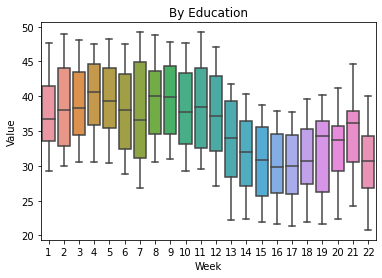

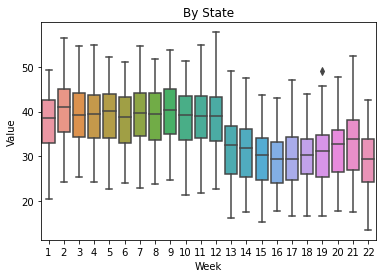

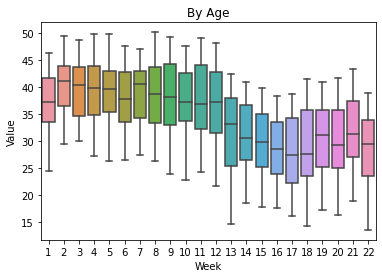

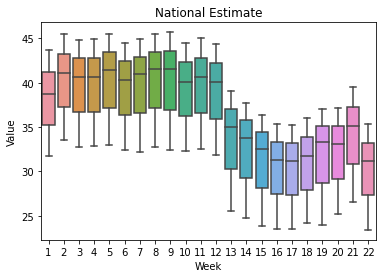

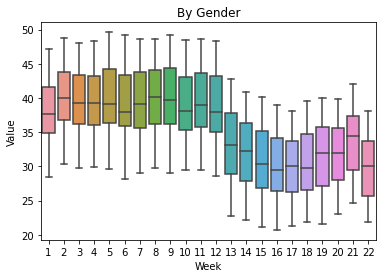

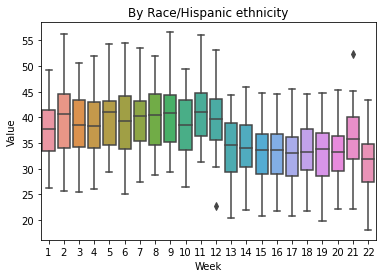

In [15]:
# create a boxplot showing value distribution each week
val_per_week_by_boxplot(df, 'Group', 'By Education')
plt.show()
val_per_week_by_boxplot(df, 'Group', 'By State')
plt.show()
val_per_week_by_boxplot(df, 'Group', 'By Age')
plt.show()
val_per_week_by_boxplot(df, 'Group', 'National Estimate')
plt.show()
val_per_week_by_boxplot(df, 'Group', 'By Gender')
plt.show()
val_per_week_by_boxplot(df, 'Group', 'By Race/Hispanic ethnicity')
plt.show()

#### On average, the biggest change in percentage value happens after week 12. We can see shift of the bars after week 11 to the lower values, which means that either government or medical care institutions started to improve on delivering care for people in time. Is this change significant?

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '18 - 29 years'),
  Text(1, 0, '30 - 39 years'),
  Text(2, 0, '40 - 49 years'),
  Text(3, 0, '50 - 59 years'),
  Text(4, 0, '60 - 69 years'),
  Text(5, 0, '70 - 79 years'),
  Text(6, 0, '80 years and above')])

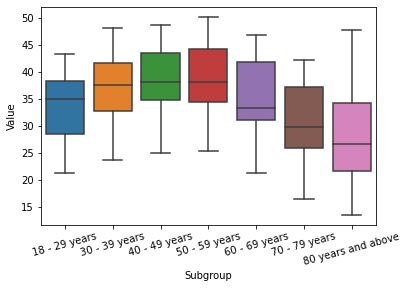

In [16]:
d_f = cut_by_group(df, 'Group', 'By Age')
sns.boxplot(x=d_f['Subgroup'], y=d_f['Value'])
plt.xticks(rotation=15)

#### The highest percentage of people, that did not get care in time are in range between 40 and 59 years

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Hispanic or Latino'),
  Text(1, 0, 'Non-Hispanic white, single race'),
  Text(2, 0, 'Non-Hispanic black, single race'),
  Text(3, 0, 'Non-Hispanic Asian, single race'),
  Text(4, 0, 'Non-Hispanic, other races and multiple races')])

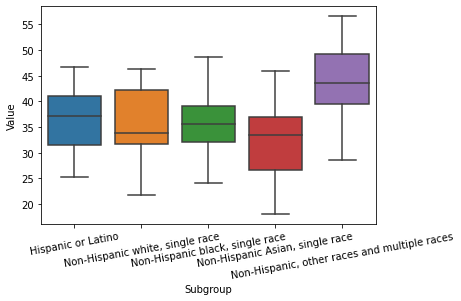

In [17]:
d_f = cut_by_group(df, 'Group', 'By Race/Hispanic ethnicity')
g = sns.boxplot(x=d_f['Subgroup'], y=d_f['Value'])
plt.xticks(rotation=10)
#g.set_xticklabels(rotation=30)

#### Among races, the highest percentage is on non-hispanic, other and multiple races people. Is there a significant difference between subgroups?

(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

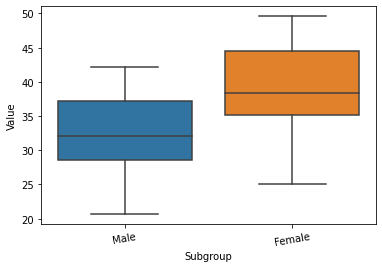

In [18]:
d_f = cut_by_group(df, 'Group', 'By Gender')
g = sns.boxplot(x=d_f['Subgroup'], y=d_f['Value'])
plt.xticks(rotation=10)

#### Interestingly enough, women were not getting as much care as men. 

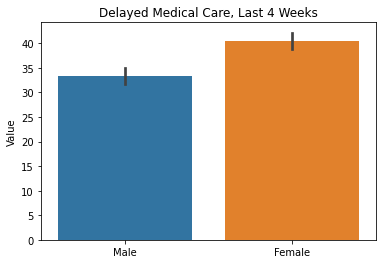

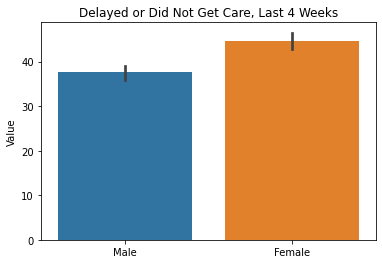

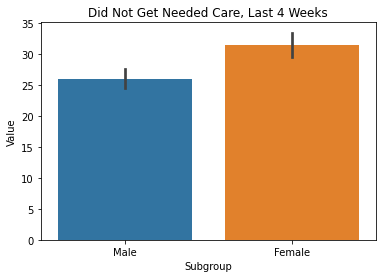

In [19]:
# 
d_f = cut_by_group(df, 'Indicator', 'Delayed Medical Care, Last 4 Weeks')
d_f = cut_by_group(d_f, 'Group', 'By Gender')
g = sns.barplot(x=d_f['Subgroup'], y=d_f['Value'])
g.set_title('Delayed Medical Care, Last 4 Weeks')
g.set(xlabel=None)
plt.show()

d_f2 = cut_by_group(df, 'Indicator', 'Delayed or Did Not Get Care, Last 4 Weeks')
d_f2 = cut_by_group(d_f2, 'Group', 'By Gender')
gg = sns.barplot(x=d_f2['Subgroup'], y=d_f2['Value'])
gg.set_title('Delayed or Did Not Get Care, Last 4 Weeks')
gg.set(xlabel=None)
plt.show()


d_f3 = cut_by_group(df, 'Indicator', 'Did Not Get Needed Care, Last 4 Weeks')
d_f3 = cut_by_group(d_f3, 'Group', 'By Gender')
ggg = sns.barplot(x=d_f3['Subgroup'], y=d_f3['Value'])
ggg.set_title('Did Not Get Needed Care, Last 4 Weeks')
plt.show()

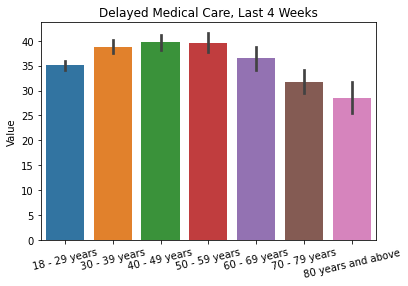

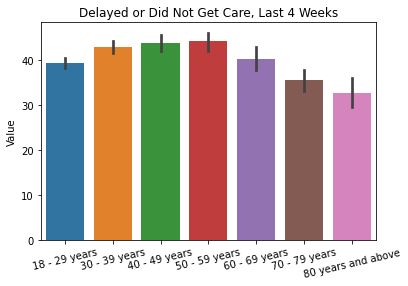

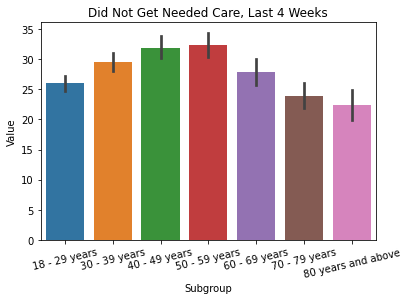

In [20]:
d_f = cut_by_group(df, 'Indicator', 'Delayed Medical Care, Last 4 Weeks')
d_f = cut_by_group(d_f, 'Group', 'By Age')
g = sns.barplot(x=d_f['Subgroup'], y=d_f['Value'])
g.set_title('Delayed Medical Care, Last 4 Weeks')
g.set(xlabel=None)
plt.xticks(rotation=13)
plt.show()

d_f2 = cut_by_group(df, 'Indicator', 'Delayed or Did Not Get Care, Last 4 Weeks')
d_f2 = cut_by_group(d_f2, 'Group', 'By Age')
gg = sns.barplot(x=d_f2['Subgroup'], y=d_f2['Value'])
gg.set_title('Delayed or Did Not Get Care, Last 4 Weeks')
gg.set(xlabel=None)
plt.xticks(rotation=13)
plt.show()

d_f3 = cut_by_group(df, 'Indicator', 'Did Not Get Needed Care, Last 4 Weeks')
d_f3 = cut_by_group(d_f3, 'Group', 'By Age')
ggg = sns.barplot(x=d_f3['Subgroup'], y=d_f3['Value'])
ggg.set_title('Did Not Get Needed Care, Last 4 Weeks')
plt.xticks(rotation=13)
plt.show()


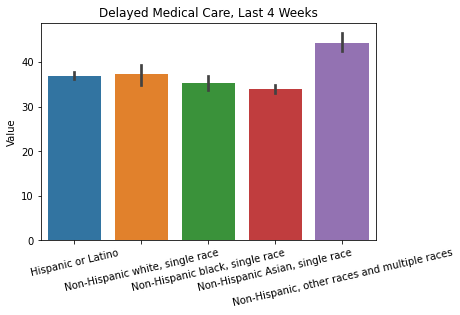

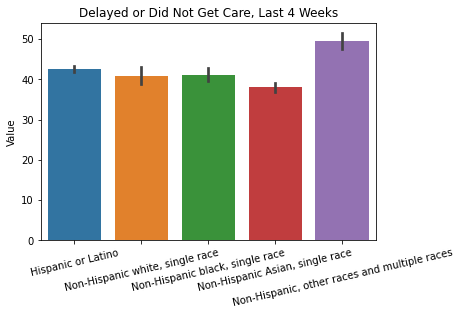

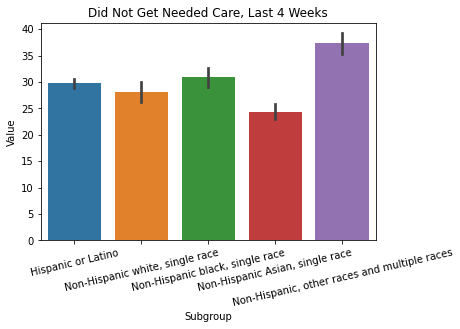

In [21]:
d_f = cut_by_group(df, 'Indicator', 'Delayed Medical Care, Last 4 Weeks')
d_f = cut_by_group(d_f, 'Group', 'By Race/Hispanic ethnicity')
g = sns.barplot(x=d_f['Subgroup'], y=d_f['Value'])
g.set_title('Delayed Medical Care, Last 4 Weeks')
g.set(xlabel=None)
plt.xticks(rotation=13)
plt.show()

d_f2 = cut_by_group(df, 'Indicator', 'Delayed or Did Not Get Care, Last 4 Weeks')
d_f2 = cut_by_group(d_f2, 'Group', 'By Race/Hispanic ethnicity')
gg = sns.barplot(x=d_f2['Subgroup'], y=d_f2['Value'])
gg.set_title('Delayed or Did Not Get Care, Last 4 Weeks')
gg.set(xlabel=None)
plt.xticks(rotation=13)
plt.show()

d_f3 = cut_by_group(df, 'Indicator', 'Did Not Get Needed Care, Last 4 Weeks')
d_f3 = cut_by_group(d_f3, 'Group', 'By Race/Hispanic ethnicity')
ggg = sns.barplot(x=d_f3['Subgroup'], y=d_f3['Value'])
ggg.set_title('Did Not Get Needed Care, Last 4 Weeks')
plt.xticks(rotation=13)
plt.show()

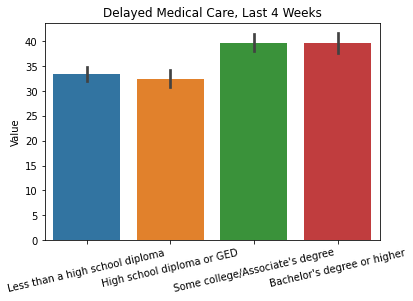

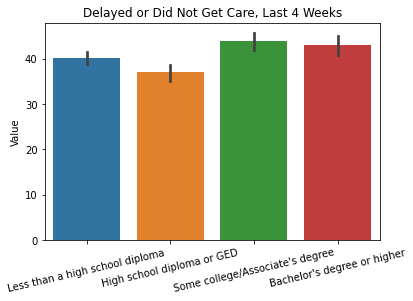

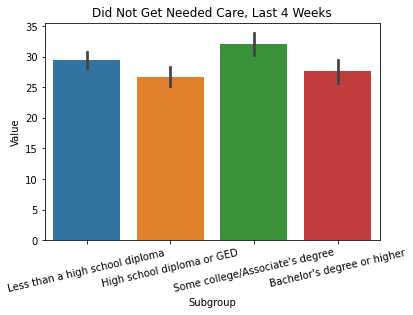

In [67]:
d_f = cut_by_group(df, 'Indicator', 'Delayed Medical Care, Last 4 Weeks')
d_f = cut_by_group(d_f, 'Group', 'By Education')
g = sns.barplot(x=d_f['Subgroup'], y=d_f['Value'])
g.set_title('Delayed Medical Care, Last 4 Weeks')
g.set(xlabel=None)
plt.xticks(rotation=13)
plt.show()

d_f2 = cut_by_group(df, 'Indicator', 'Delayed or Did Not Get Care, Last 4 Weeks')
d_f2 = cut_by_group(d_f2, 'Group', 'By Education')
gg = sns.barplot(x=d_f2['Subgroup'], y=d_f2['Value'])
gg.set_title('Delayed or Did Not Get Care, Last 4 Weeks')
gg.set(xlabel=None)
plt.xticks(rotation=13)
plt.show()

d_f3 = cut_by_group(df, 'Indicator', 'Did Not Get Needed Care, Last 4 Weeks')
d_f3 = cut_by_group(d_f3, 'Group', 'By Education')
ggg = sns.barplot(x=d_f3['Subgroup'], y=d_f3['Value'])
ggg.set_title('Did Not Get Needed Care, Last 4 Weeks')
plt.xticks(rotation=13)
plt.show()

In [66]:
# Given previously acquired knowledge, separate dataframe into two parts and perform mean difference test
# to see if there is significant difference between 11 first weeks of experiment and other 11

import statsmodels.stats.weightstats as ws
from scipy import stats

from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm


# First, separate dataset into two parts

lower_df, higher_df = df.loc[df['Week'] < 12], df.loc[df['Week'] >= 12]

# Second, check if there is any null entries

print(f'# # # Amount of null entries in Value column of lower_df # # # \n{lower_df.Value.isna().sum()} \n')

print(f'# # # Amount of null entries in Value column of higher_df # # # \n{higher_df.Value.isna().sum()} \n')

print(lower_df.Value.describe(), '\n')
print(higher_df.Value.describe())

# create descriptive statistics
col1 = ws.DescrStatsW(lower_df['Value'])
col2 = ws.DescrStatsW(higher_df['Value'])

compare = ws.CompareMeans(col1, col2)

print('\n', compare.summary())

ttest2 = stats.ttest_ind(lower_df['Value'], higher_df['Value'])

print(f'T-test value: {ttest2[0]}, p-value: {ttest2[1]}')


# # # Amount of null entries in Value column of lower_df # # # 
0 

# # # Amount of null entries in Value column of higher_df # # # 
0 

count    2310.000000
mean       39.039264
std         6.430923
min        20.600000
25%        33.925000
50%        39.600000
75%        44.000000
max        56.600000
Name: Value, dtype: float64 

count    2310.000000
mean       31.445758
std         6.864774
min        13.600000
25%        26.100000
50%        31.700000
75%        36.200000
max        57.700000
Name: Value, dtype: float64

                           Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1      7.5935      0.196     38.799      0.000       7.210       7.977
T-test value: 38.79905654288304, p-value: 2.73938588550034e-285


#### T-test suggests, that there is significant difference in the values before and after week 11, e.g. there is very low probability, that experiment happened by a chance.

In [46]:
# Another small test for significance between male and female groups

temp_df = cut_by_group(df, 'Group', 'By Gender')
df_male, df_female = temp_df[temp_df['Subgroup'] == 'Male'], temp_df[temp_df['Subgroup'] == 'Female']

print(df_male.Value.describe(), '\n')
print(df_female.Value.describe())

# create descriptive statistics
col1 = ws.DescrStatsW(df_male['Value'])
col2 = ws.DescrStatsW(df_female['Value'])

compare = ws.CompareMeans(col1, col2)

print('\n', compare.summary())

ttest = stats.ttest_ind(df_male['Value'], df_female['Value'])
print(f'T-test value: {ttest[0]}, p-value: {ttest[1]}')



count    66.000000
mean     32.315152
std       6.192533
min      20.700000
25%      28.525000
50%      32.100000
75%      37.175000
max      42.200000
Name: Value, dtype: float64 

count    66.000000
mean     38.913636
std       7.087864
min      25.000000
25%      35.200000
50%      38.350000
75%      44.550000
max      49.600000
Name: Value, dtype: float64

                           Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -6.5985      1.159     -5.696      0.000      -8.891      -4.306
T-test value: -5.695546920866709, p-value: 7.816742216218068e-08


#### T-test suggests, that there is statistically significant difference between male and female groups, that didn't get care in time. As can be seen on the plots above, on average, female were getting less care than male.

In [64]:
# Perform ANOVA analysis of the dataframe cut by ethnicity, to see if there is significant difference
# between groups


d_f = cut_by_group(df, 'Group', 'By Race/Hispanic ethnicity')

lm = ols('Value ~ C(Subgroup)', data=d_f).fit()
print(lm.summary(), '\n\n')

print(anova_lm(lm, typ=2))

d_f.groupby('Subgroup')['Value'].mean()

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     28.69
Date:                Thu, 11 Feb 2021   Prob (F-statistic):           1.97e-20
Time:                        15:34:22   Log-Likelihood:                -1083.4
No. Observations:                 330   AIC:                             2177.
Df Residuals:                     325   BIC:                             2196.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

Subgroup
Hispanic or Latino                              36.393939
Non-Hispanic Asian, single race                 32.072727
Non-Hispanic black, single race                 35.790909
Non-Hispanic white, single race                 35.387879
Non-Hispanic, other races and multiple races    43.728788
Name: Value, dtype: float64

#### Ordinary least squares analysis suggests, that people with multiple race had more problems with getting medical care in time, than people of other races

In [65]:
# Perform ANOVA analysis of the dataframe cut by ethnicity, to see if there is significant difference
# between groups

d_f = cut_by_group(df, 'Group', 'By Age')

lm2 = ols('Value ~ C(Subgroup)', data=d_f).fit()
print(lm2.summary(), '\n\n')

print(anova_lm(lm2, typ=2))

d_f.groupby('Subgroup')['Value'].mean()

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     22.30
Date:                Thu, 11 Feb 2021   Prob (F-statistic):           4.72e-23
Time:                        15:34:24   Log-Likelihood:                -1558.3
No. Observations:                 462   AIC:                             3131.
Df Residuals:                     455   BIC:                             3159.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

Subgroup
18 - 29 years         33.519697
30 - 39 years         37.110606
40 - 49 years         38.524242
50 - 59 years         38.734848
60 - 69 years         34.930303
70 - 79 years         30.434848
80 years and above    27.874242
Name: Value, dtype: float64

#### OLS analysis suggests, that people of age between 30 and 59 years were having more problems with getting medical care, than people of other groups. Additionally, people of age 70 and above were having less problems with getting medical care (with mean percent of delayed/no care provided ~30 for '70-79' group and ~27 for '80 and above' group.

In [69]:
# Perform ANOVA analysis of the dataframe cut by ethnicity, to see if there is significant difference
# between groups


d_f = cut_by_group(df, 'Group', 'By Education')

lm = ols('Value ~ C(Subgroup)', data=d_f).fit()
print(lm.summary(), '\n\n')

print(anova_lm(lm, typ=2))

d_f.groupby('Subgroup')['Value'].mean()

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     11.93
Date:                Thu, 11 Feb 2021   Prob (F-statistic):           2.40e-07
Time:                        15:38:00   Log-Likelihood:                -871.87
No. Observations:                 264   AIC:                             1752.
Df Residuals:                     260   BIC:                             1766.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

Subgroup
Bachelor's degree or higher        36.783333
High school diploma or GED         32.098485
Less than a high school diploma    34.356061
Some college/Associate's degree    38.551515
Name: Value, dtype: float64

#### OLS analysis suggests, that people with college/associate's degree have had more problems with getting medical care.

### In conclusion, we can say that in general medical care improved in United States after week 11, which means that smaller amount of people had problems with getting medical care during COVID pandemic. There is a significant difference between male and female groups percentage values, which means that male were having more medical care than female. Additionally, people aged 70 and above on average were having less problems with getting medical care, than younger people. Furthermore, people with college/associate's degree were having more problems with getting medical care and people with multiple race had more problems with getting medical care in time, than people of other races.